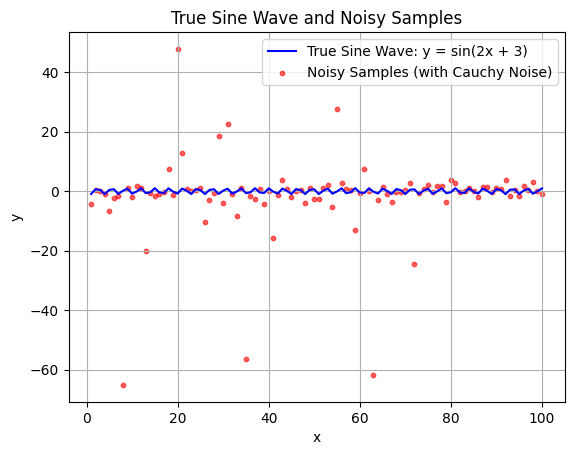

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 101)
y = np.sin(2 * x + 3)

num_samples = len(x)
sd_normal_1 = np.random.randn(num_samples)
sd_normal_2 = np.random.randn(num_samples)

epsilon = 1e-10 
cauchy_noise = sd_normal_1 / (sd_normal_2 + (sd_normal_2 == 0) * epsilon)

y_noisy = y + cauchy_noise

plt.plot(x, y, label='True Sine Wave: y = sin(2x + 3)', color='blue')
plt.scatter(x, y_noisy, label='Noisy Samples (with Cauchy Noise)', color='red', s=10, alpha=0.6)
plt.title('True Sine Wave and Noisy Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


--- Estimating with Squared Error ---
Starting EA with squared_error for 10000 generations...
  Generation 0: Best Error = 16952.6166, a = 2.8430, b = 1.1617
  Generation 1000: Best Error = 16911.8503, a = 3.4289, b = 2.7449
  Generation 2000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 3000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 4000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 5000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 6000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 7000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 8000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
  Generation 9000: Best Error = 16910.8222, a = 3.4286, b = 2.6898
EA finished for squared_error.
Estimated a: 3.4286
Estimated b: 2.6898
Final Squared Error: 16910.8222

--- Estimating with Absolute Error ---
Starting EA with absolute_error for 10000 generations...
  Generation 0: Best Error = 536.3478,

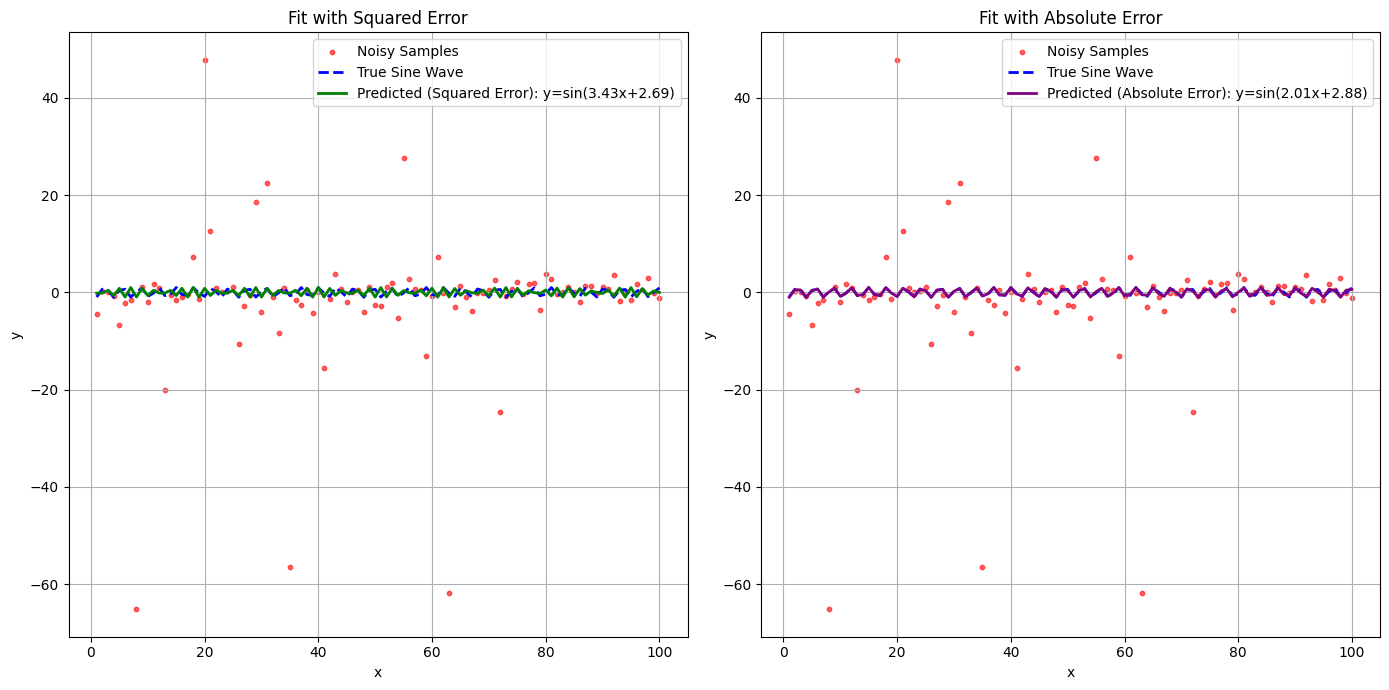

In [20]:
def predict_y(x, a, b):
    return np.sin(a * x + b)

def squared_error(y_hat, y_actual):
    return np.sum((y_hat - y_actual)**2)

def absolute_error(y_hat, y_actual):
    return np.sum(np.abs(y_hat - y_actual))

def evolution(x_data, y_data, objective_function, 
                               generations=10000, pop_size=100, 
                               mutation_factor=0.2):
    a_min, a_max = 0.5, 4.0 
    b_min, b_max = 1.0, 5.0 
    
    pop_a = np.random.uniform(a_min, a_max, pop_size)
    pop_b = np.random.uniform(b_min, b_max, pop_size)
    
    best_a, best_b = None, None
    best_error = float('inf')
    
    print(f"Starting EA with {objective_function.__name__} for {generations} generations...")
    
    for gen in range(generations):
        errors = np.zeros(pop_size)
        for i in range(pop_size):
            y_predicted = predict_y(x_data, pop_a[i], pop_b[i])
            errors[i] = objective_function(y_predicted, y_data)
        
        min_error_idx = np.argmin(errors)
        current_best_error = errors[min_error_idx]
        current_best_a = pop_a[min_error_idx]
        current_best_b = pop_b[min_error_idx]

        if current_best_error < best_error:
            best_error = current_best_error
            best_a = current_best_a
            best_b = current_best_b
            
        next_pop_a = np.zeros(pop_size)
        next_pop_b = np.zeros(pop_size)

        next_pop_a[0] = best_a
        next_pop_b[0] = best_b

        for i in range(1, pop_size): 
            parent_idx = np.random.randint(0, pop_size)
            
            mutation_a = np.random.randn() * (a_max - a_min) * mutation_factor
            mutation_b = np.random.randn() * (b_max - b_min) * mutation_factor
            
            new_a = pop_a[parent_idx] + mutation_a
            new_b = pop_b[parent_idx] + mutation_b
            
            next_pop_a[i] = np.clip(new_a, a_min, a_max)
            next_pop_b[i] = np.clip(new_b, b_min, b_max)
            
        pop_a = next_pop_a
        pop_b = next_pop_b
        
        if gen % 1000 == 0:
            print(f"  Generation {gen}: Best Error = {best_error:.4f}, a = {best_a:.4f}, b = {best_b:.4f}")
            
    print(f"EA finished for {objective_function.__name__}.")
    return best_a, best_b, best_error

print("\n--- Estimating with Squared Error ---")
best_a_sq, best_b_sq, best_error_sq = evolution(x, y_noisy, squared_error)
print(f"Estimated a: {best_a_sq:.4f}")
print(f"Estimated b: {best_b_sq:.4f}")
print(f"Final Squared Error: {best_error_sq:.4f}")

y_predicted_sq = predict_y(x, best_a_sq, best_b_sq)

print("\n--- Estimating with Absolute Error ---")
best_a_abs, best_b_abs, best_error_abs = evolution(x, y_noisy, absolute_error)
print(f"Estimated a: {best_a_abs:.4f}")
print(f"Estimated b: {best_b_abs:.4f}")
print(f"Final Absolute Error: {best_error_abs:.4f}")

y_predicted_abs = predict_y(x, best_a_abs, best_b_abs)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x, y_noisy, label='Noisy Samples', color='red', s=10, alpha=0.6)
plt.plot(x, y, label='True Sine Wave', color='blue', linestyle='--', linewidth=2)
plt.plot(x, y_predicted_sq, label=f'Predicted (Squared Error): y=sin({best_a_sq:.2f}x+{best_b_sq:.2f})', color='green', linewidth=2)
plt.title('Fit with Squared Error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x, y_noisy, label='Noisy Samples', color='red', s=10, alpha=0.6)
plt.plot(x, y, label='True Sine Wave', color='blue', linestyle='--', linewidth=2)
plt.plot(x, y_predicted_abs, label=f'Predicted (Absolute Error): y=sin({best_a_abs:.2f}x+{best_b_abs:.2f})', color='purple', linewidth=2)
plt.title('Fit with Absolute Error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion
Based on the proximity of the estimated parameters to the true parameters, the Absolute Error objective function generally gives a better answer. Cauchy noise generates outliers much more frequently than Gaussian noise. The squared error  heavily penalizes large errors because the errors are squared. This makes it sensitive to outliers. The absolute error (L1 norm) penalizes errors linearly, making it more robust to outliers.